## 1. exploration

In [189]:
#libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [190]:
df = pd.read_csv('student_extended_ml_dataset2.csv')

In [191]:
df

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low
...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High


In [192]:
#checking missing values
df.isnull().sum()

Name                 0
Age                  0
Gender               0
Hours_Studied        0
IQ                   0
Physics_Marks        0
Math_Marks           0
Chemistry_Marks      0
Has_Part_Time_Job    0
Study_Hours_Group    0
dtype: int64

In [193]:
df.describe()
#means marks seem to be oddly similar

,Age,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,31.444800,5.499279,114.915200,70.311000,69.816000,69.798800
std,8.148388,2.588333,20.551839,17.753538,17.536626,17.487913
min,18.000000,1.002452,80.000000,40.000000,40.000000,40.000000
25%,24.000000,3.258910,97.000000,55.000000,54.000000,55.000000
50%,32.000000,5.474256,115.000000,71.000000,70.000000,70.000000
75%,38.000000,7.726088,133.000000,86.000000,85.000000,85.000000
max,45.000000,9.999925,150.000000,100.000000,100.000000,100.000000


In [194]:
df['Average_Marks'] = df[['Chemistry_Marks','Math_Marks','Physics_Marks']].mean(axis=1).round(2)
df['Average_Marks'] 

0       71.67
1       73.67
2       65.33
3       79.67
4       75.33
        ...  
4995    79.00
4996    79.00
4997    81.00
4998    84.00
4999    65.33
Name: Average_Marks, Length: 5000, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

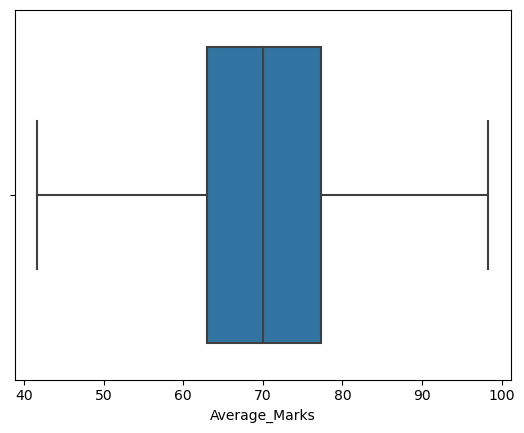

In [195]:
sns.boxplot(data=df, x="Average_Marks")
plt.show
#no outliters found

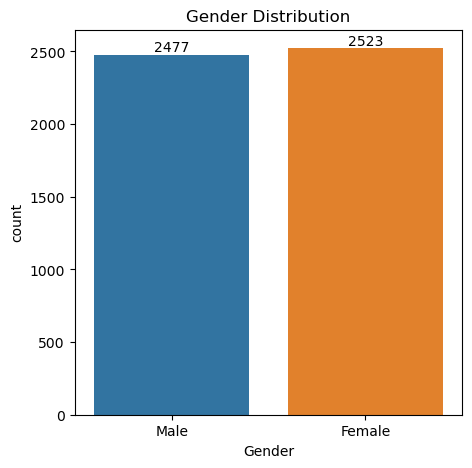

In [196]:

plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()
#data consists of slightly more female observations than male

Study_Hours_Group  High   Low
Gender                       
Female             1379  1144
Male               1384  1093


<Axes: xlabel='Gender'>

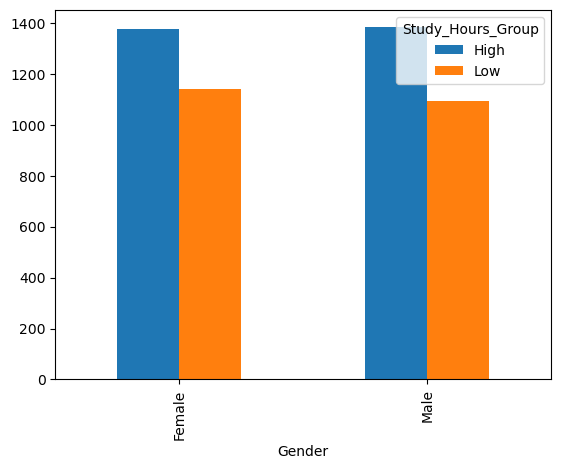

In [197]:
CrosstabResult=pd.crosstab(index=df['Gender'],columns=df['Study_Hours_Group'])
print(CrosstabResult)
CrosstabResult.plot.bar()
#no correlation between study hours group and gender

                   Math_Marks  Physics_Marks  Chemistry_Marks
Study_Hours_Group                                            
High                69.917843      70.456750        69.871516
Low                 69.690210      70.130979        69.708985


<function matplotlib.pyplot.show(close=None, block=None)>

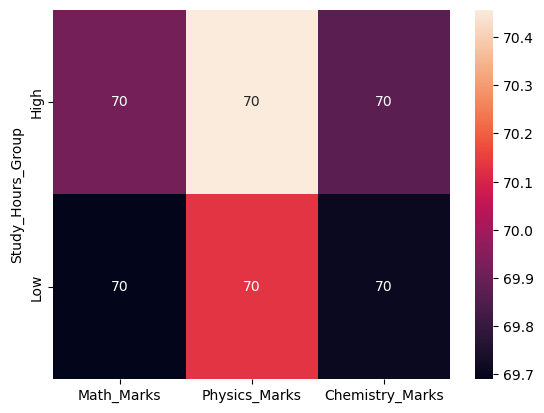

In [198]:
gb1=df.groupby("Study_Hours_Group").agg({"Math_Marks":"mean","Physics_Marks":"mean","Chemistry_Marks":"mean"})
print(gb1)
sns.heatmap(gb1, annot = True)
plt.show
#as gender and study group huors arent correlated we can also conclude similarly marks and study hours and gender arent correlated either.

In [199]:
#as age and IQ are continous features we can bin them into groups as machine learning models dont work wel with them
df['Age_Band'] = 0
df['IQ_Band'] = 0

In [200]:
#getting quatiles to bin the data 
print(df['Age'].quantile([0.25, 0.5, 0.75]))
print(df['IQ'].quantile([0.25, 0.5, 0.75]))

0.25    24.0
0.50    32.0
0.75    38.0
Name: Age, dtype: float64
0.25     97.0
0.50    115.0
0.75    133.0
Name: IQ, dtype: float64


In [201]:
df.loc[(df['Age']<=24),'Age_Band']=0
df.loc[(df['Age']>24)&(df['Age']<=32),'Age_Band']=1
df.loc[(df['Age']>32)&(df['Age']<=38),'Age_Band']=2
df.loc[(df['Age']>38),'Age_Band']=4
df['Age_Band']


0       0
1       2
2       2
3       2
4       1
       ..
4995    1
4996    2
4997    2
4998    0
4999    2
Name: Age_Band, Length: 5000, dtype: int64

In [202]:


df['Age_Band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_Band
1,1383
0,1287
4,1247
2,1083


In [203]:
df.loc[(df['IQ']<=97),'IQ_Band']=0
df.loc[(df['IQ']>97)&(df['IQ']<=115),'IQ_Band']=1
df.loc[(df['IQ']>115)&(df['IQ']<=133),'IQ_Band']=2
df.loc[(df['IQ']>133),'IQ_Band']=4
df['IQ_Band']

0       0
1       1
2       2
3       4
4       0
       ..
4995    4
4996    2
4997    1
4998    4
4999    0
Name: IQ_Band, Length: 5000, dtype: int64

In [204]:


df['IQ_Band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,IQ_Band
0,1298
2,1270
1,1229
4,1203


(array([575., 549., 491., 364., 513., 532., 356., 560., 528., 532.]),
 array([18. , 20.7, 23.4, 26.1, 28.8, 31.5, 34.2, 36.9, 39.6, 42.3, 45. ]),
 <BarContainer object of 10 artists>)

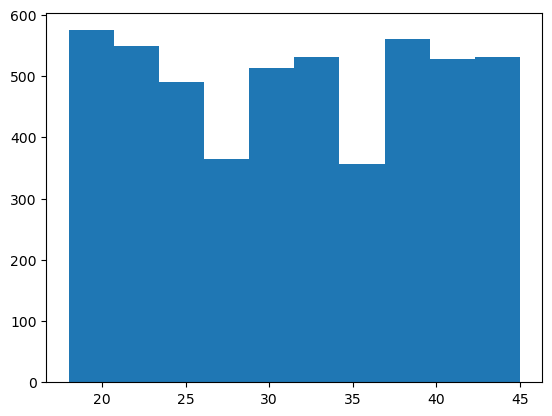

In [205]:
plt.hist(df['Age'], bins=10)

(array([474., 553., 471., 478., 474., 515., 494., 478., 500., 563.]),
 array([ 80.,  87.,  94., 101., 108., 115., 122., 129., 136., 143., 150.]),
 <BarContainer object of 10 artists>)

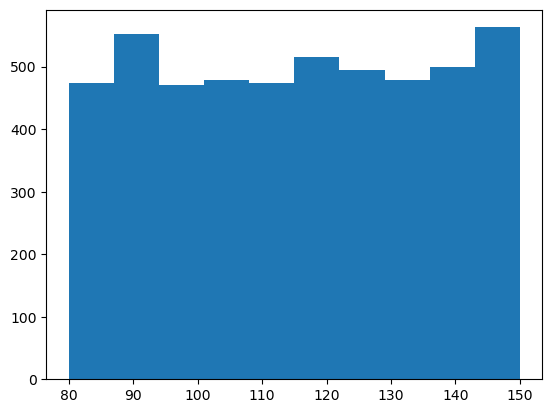

In [206]:
plt.hist(df['IQ'], bins=10)
#seems uniformly distributed??


(array([ 53., 196., 410., 897., 928., 986., 862., 425., 197.,  46.]),
 array([41.67 , 47.336, 53.002, 58.668, 64.334, 70.   , 75.666, 81.332,
        86.998, 92.664, 98.33 ]),
 <BarContainer object of 10 artists>)

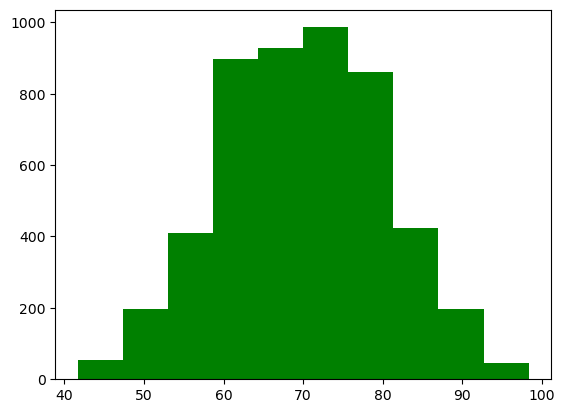

In [207]:
plt.hist(df['Average_Marks'], bins=10, color='green')
#seems to be normally distributed??

<function matplotlib.pyplot.show(close=None, block=None)>

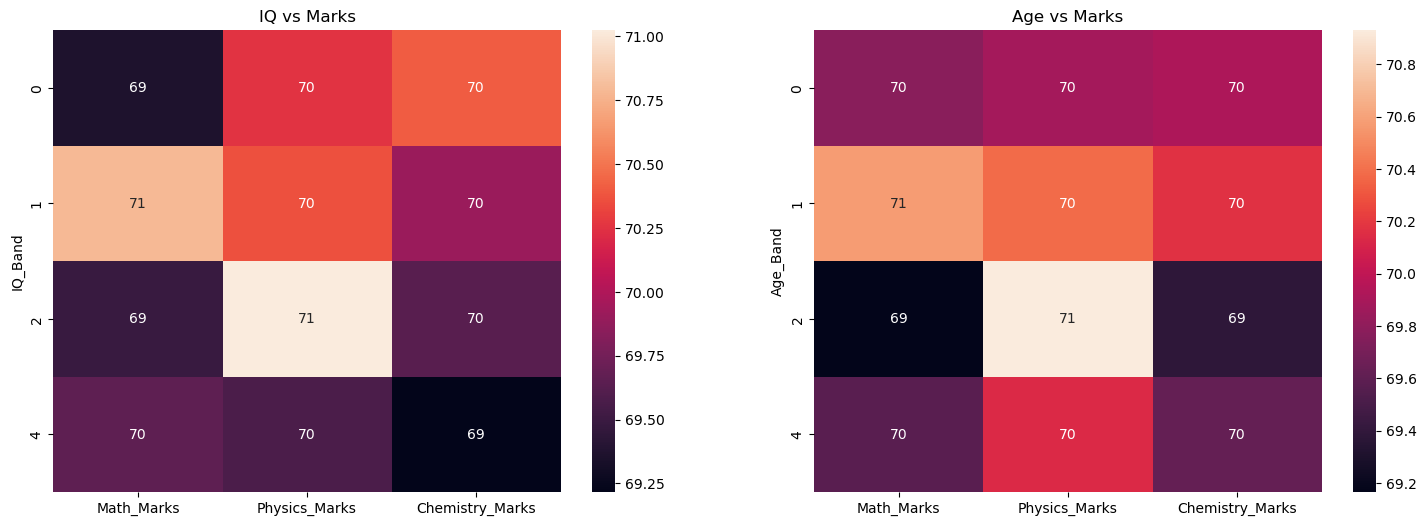

In [208]:
gb3=df.groupby("IQ_Band").agg({"Math_Marks":"mean","Physics_Marks":"mean","Chemistry_Marks":"mean"})
gb4=df.groupby("Age_Band").agg({"Math_Marks":"mean","Physics_Marks":"mean","Chemistry_Marks":"mean"})
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.heatmap(gb3,ax = ax[0],annot = True)
ax[0].set_title('IQ vs Marks')
sns.heatmap(gb4,ax = ax[1], annot = True)
ax[1].set_title('Age vs Marks')
plt.show
#tells us IQ and marks arent correlated at all

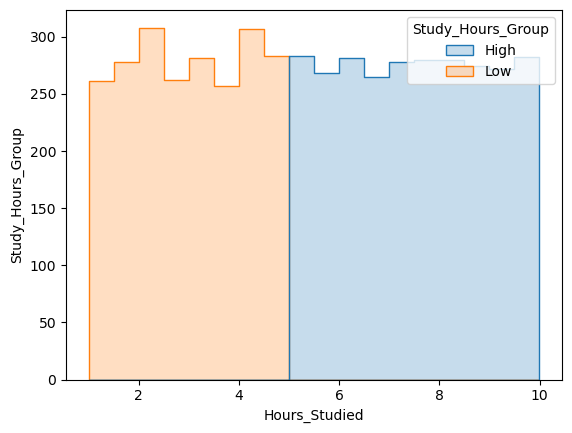

In [209]:
#hours studied and study group hours 
sns.histplot(data=df, x='Hours_Studied', hue='Study_Hours_Group', element='step', common_norm=False)
plt.xlabel('Hours_Studied')
plt.ylabel('Study_Hours_Group')
plt.show()
#we can see above the ~5hr threshold the study hours group is high 

## 2. data preprocessing and feature engineering

In [210]:
df

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Average_Marks,Age_Band,IQ_Band
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High,71.67,0,0
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High,73.67,2,1
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High,65.33,2,2
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low,79.67,2,4
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low,75.33,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low,79.00,1,4
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low,79.00,2,2
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low,81.00,2,1
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High,84.00,0,4


In [211]:
#train test split
#label encoding
#kPCA
#catboost
#fitting model
#predicting
#evaluating

In [212]:
modelling_data_frame = df.copy()
modelling_data_frame.drop(['Name','Age','IQ','Average_Marks'], axis=1, inplace=True)
modelling_data_frame

,Gender,Hours_Studied,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Age_Band,IQ_Band
0,Male,8.140821,87,43,85,True,High,0,0
1,Female,9.825626,86,81,54,False,High,2,1
2,Male,8.835372,87,52,57,True,High,2,2
3,Male,2.482483,70,86,83,False,Low,2,4
4,Female,4.419793,95,48,83,True,Low,1,0
...,...,...,...,...,...,...,...,...,...
4995,Female,3.653474,93,59,85,True,Low,1,4
4996,Female,1.096493,68,70,99,True,Low,2,2
4997,Male,4.156770,76,96,71,False,Low,2,1
4998,Female,6.788548,81,98,73,False,High,0,4


In [213]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
modelling_data_frame['Gender'] = le.fit_transform(modelling_data_frame['Gender'])
modelling_data_frame['Study_Hours_Group'] = le.fit_transform(modelling_data_frame['Study_Hours_Group'])
modelling_data_frame['Has_Part_Time_Job'] = le.fit_transform(modelling_data_frame['Has_Part_Time_Job'])
modelling_data_frame

,Gender,Hours_Studied,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Age_Band,IQ_Band
0,1,8.140821,87,43,85,1,0,0,0
1,0,9.825626,86,81,54,0,0,2,1
2,1,8.835372,87,52,57,1,0,2,2
3,1,2.482483,70,86,83,0,1,2,4
4,0,4.419793,95,48,83,1,1,1,0
...,...,...,...,...,...,...,...,...,...
4995,0,3.653474,93,59,85,1,1,1,4
4996,0,1.096493,68,70,99,1,1,2,2
4997,1,4.156770,76,96,71,0,1,2,1
4998,0,6.788548,81,98,73,0,0,0,4


In [214]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 1, kernel = 'rbf')
kpca_values = modelling_data_frame[['Math_Marks','Physics_Marks','Chemistry_Marks']].to_numpy()
kpca_values.shape


(5000, 3)

In [215]:
kpca_values = kpca.fit_transform(kpca_values)
kpca_values.shape

(5000, 1)

In [216]:
kpca_values

array([[-0.00129306],
       [-0.00099639],
       [-0.00077624],
       ...,
       [-0.0007046 ],
       [-0.00096759],
       [-0.00091421]])

In [217]:
modelling_data_frame.drop(['Math_Marks','Physics_Marks','Chemistry_Marks'], axis=1, inplace=True)
modelling_data_frame

,Gender,Hours_Studied,Has_Part_Time_Job,Study_Hours_Group,Age_Band,IQ_Band
0,1,8.140821,1,0,0,0
1,0,9.825626,0,0,2,1
2,1,8.835372,1,0,2,2
3,1,2.482483,0,1,2,4
4,0,4.419793,1,1,1,0
...,...,...,...,...,...,...
4995,0,3.653474,1,1,1,4
4996,0,1.096493,1,1,2,2
4997,1,4.156770,0,1,2,1
4998,0,6.788548,0,0,0,4


In [218]:
y = modelling_data_frame['Study_Hours_Group'].to_numpy()
y

array([0, 0, 0, ..., 1, 0, 1])

In [219]:
modelling_data_frame.drop(['Study_Hours_Group'], axis=1, inplace=True)
modelling_data_frame

,Gender,Hours_Studied,Has_Part_Time_Job,Age_Band,IQ_Band
0,1,8.140821,1,0,0
1,0,9.825626,0,2,1
2,1,8.835372,1,2,2
3,1,2.482483,0,2,4
4,0,4.419793,1,1,0
...,...,...,...,...,...
4995,0,3.653474,1,1,4
4996,0,1.096493,1,2,2
4997,1,4.156770,0,2,1
4998,0,6.788548,0,0,4


In [220]:
#not considering gender as we previously saw it had no effect on study hours group
X = modelling_data_frame.iloc[:, 1: ].values
X.shape

(5000, 4)

## 3. modelling

In [221]:
X = np.concatenate([X, kpca_values], axis=1)
X

array([[ 8.14082056e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.29306370e-03],
       [ 9.82562647e+00,  0.00000000e+00,  2.00000000e+00,
         1.00000000e+00, -9.96387798e-04],
       [ 8.83537190e+00,  1.00000000e+00,  2.00000000e+00,
         2.00000000e+00, -7.76238405e-04],
       ...,
       [ 4.15676969e+00,  0.00000000e+00,  2.00000000e+00,
         1.00000000e+00, -7.04597528e-04],
       [ 6.78854842e+00,  0.00000000e+00,  0.00000000e+00,
         4.00000000e+00, -9.67589210e-04],
       [ 1.62711148e+00,  1.00000000e+00,  2.00000000e+00,
         0.00000000e+00, -9.14214770e-04]])

In [222]:
y

array([0, 0, 0, ..., 1, 0, 1])

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [225]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [226]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.018621
0:	learn: 0.6444531	total: 52.3ms	remaining: 52.3s
1:	learn: 0.5994297	total: 58.6ms	remaining: 29.3s
2:	learn: 0.5541030	total: 60.2ms	remaining: 20s
3:	learn: 0.5117289	total: 62.3ms	remaining: 15.5s
4:	learn: 0.4734685	total: 64.3ms	remaining: 12.8s
5:	learn: 0.4382532	total: 66.2ms	remaining: 11s
6:	learn: 0.4069933	total: 68ms	remaining: 9.65s
7:	learn: 0.3817292	total: 70.4ms	remaining: 8.73s
8:	learn: 0.3527574	total: 72.7ms	remaining: 8s
9:	learn: 0.3246008	total: 74.3ms	remaining: 7.36s
10:	learn: 0.2986413	total: 76.4ms	remaining: 6.87s
11:	learn: 0.2759942	total: 79.3ms	remaining: 6.53s
12:	learn: 0.2558183	total: 80.6ms	remaining: 6.12s
13:	learn: 0.2363410	total: 82.2ms	remaining: 5.79s
14:	learn: 0.2224268	total: 84.5ms	remaining: 5.55s
15:	learn: 0.2085773	total: 86.8ms	remaining: 5.33s
16:	learn: 0.1941224	total: 89.2ms	remaining: 5.16s
17:	learn: 0.1805785	total: 90.6ms	remaining: 4.95s
18:	learn: 0.1698652	total: 93.3ms	remaining: 4.82s
1

In [227]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[553   0]
 [  0 447]]


1.0